In [1]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import regularizers

from keras import regularizers

In [2]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain.shape

(60000,)

In [5]:
xtest.shape

(10000, 28, 28)

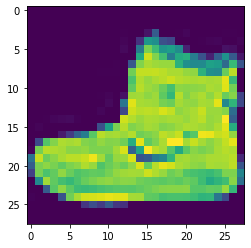

In [6]:
plt.imshow(xtrain[0])

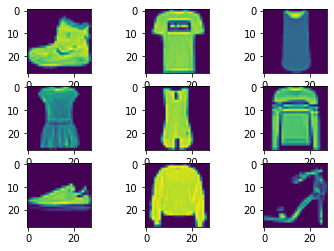

In [7]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(xtrain[i])

# data pre processing

In [8]:
#normalisation  to scale the data .....pixel are zero to 255
xtrain=xtrain/255.0
xtest=xtest/255.0

In [9]:
classes=['tshirt/top','trouser','pollover','dress','sandal','coat','shirt','sneaker','bag','Ankle boot']

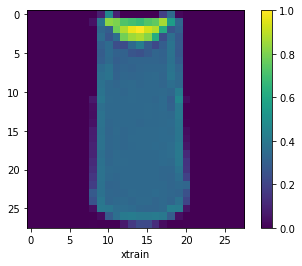

In [10]:
plt.figure()
plt.imshow(xtrain[2])
plt.colorbar()
plt.xlabel('xtrain')
plt.show()

In [11]:
#building of the model / 128 means 

model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10)])

In [12]:
#compile
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
output=model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8248
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8650: 
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8765
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8855
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8902
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8952
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9002
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2512 - accuracy: 0.9054
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2

In [17]:
import os.path
from tensorflow.keras.models import load_model
if os.path.isfile('C:/Users/88016/Documents/INT248/Unit 2/model.h5'):
    model.save('C:/Users/88016/Documents/INT248/Unit 2/model.h5')
new_model=load_model('C:/Users/88016/Documents/INT248/Unit 2/model.h5') 

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.3957 - accuracy: 0.8772


[0.39572054147720337, 0.8772000074386597]

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
ypred=model.predict(xtest)

In [22]:
img=xtest[1]
img=np.expand_dims(img,0)
p1=model.predict(img)
classes[np.argmax(p1)]

'pollover'

In [23]:
classes[np.argmax(p1)]

'pollover'

In [26]:
np.argmax(ypred[5])

6

# COMPLETE

In [27]:
result=output.history

In [28]:
Epochs=range(0,50)

NameError: name 'epochs' is not defined

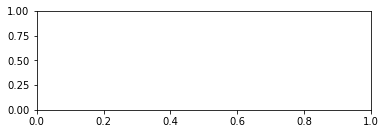

In [29]:
plt.figure(1)
plt.subplot(211)
plt.plot(epochs,result['loss'],c='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(212)
plt.plot(epochs,result['accuracy'],c='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [30]:
probability=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [31]:
pred=probability.predict(xtest)

In [32]:
pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9963260e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.6742262e-04], dtype=float32)

In [33]:
img=xtest[0]
img=np.expand_dims(img,0)
p1=model.predict(img)

In [34]:
classes[np.argmax(p1)]

'coat'

# BETTER CODE

In [44]:
#Image classification

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#import dataset
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [45]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [46]:
#explore the data
train_images.shape

(60000, 28, 28)

In [47]:
test_images.shape

(10000, 28, 28)

In [48]:
len(train_labels)

60000

In [49]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [50]:
len(test_labels)

10000

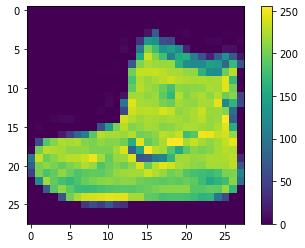

In [51]:
#Data Preprocessing
plt.figure()
plt.imshow(train_images[0])
#plt.imshow(train_images[3])
plt.colorbar()
plt.show()

In [52]:
#to scaling to 0 and 1
train_images=train_images/255
test_images=test_images/255

In [53]:
#Building of the model
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),# input layer
                        keras.layers.Dense(128,activation='relu'),#hidden layer
                        keras.layers.Dense(10)#output layer
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
#compile
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
#fit the model (for data training)
output=model.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5030 - accuracy: 0.8233
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8646
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8768
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8858
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.8922
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8978
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9040
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2470 - accuracy: 0.9078
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [56]:
#test data
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('\n Test accuracy:',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5079 - accuracy: 0.8893

 Test accuracy: 0.8892999887466431


In [57]:
result=output.history

In [58]:
epochs=range(0,50)

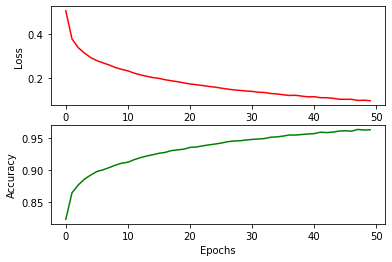

In [59]:
plt.figure(1)
plt.subplot(211)
plt.plot(epochs,result['loss'],c='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(212)
plt.plot(epochs,result['accuracy'],c='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [60]:
#make predictions
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [61]:
predictions=probability_model.predict(test_images)

In [62]:
predictions[0]

array([2.2186536e-17, 1.2135605e-28, 8.5379589e-18, 2.6729695e-27,
       8.0293095e-24, 2.9386507e-09, 3.2795482e-23, 1.6792751e-07,
       2.8422502e-14, 9.9999988e-01], dtype=float32)

In [63]:
img=test_images[4]
img=np.expand_dims(img,0)
p2=model.predict(img)
class_names[np.argmax(p2)]

'Shirt'